<a href="https://colab.research.google.com/github/KacperGrodecki/nieruchomosci-mazowieckie/blob/0.0.4/mazowieckie_colab_rysunki_mieszkania_i_analiza_wczytanie_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import numpy as np
np.random.seed(7)
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
#from otoDomScraper import daneDomu
#from random import randrange
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from IPython.display import Javascript
import requests
from collections import OrderedDict
import seaborn as sns
from sklearn import preprocessing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
filename='/content/drive/My Drive/domymazowieckie/dfMieszkania_analysis_final.csv'

In [49]:
final=pd.read_csv(filename,index_col=0)

In [50]:
final.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,NaN,NaN
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170


In [51]:
final=final[final['powierzchnia_corr']<500]
final=final[final['powierzchniaDzialki_corr']<5000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



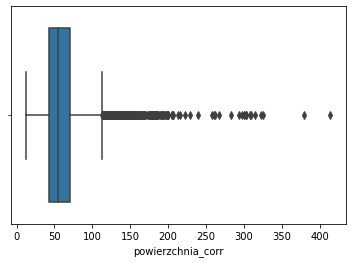

In [52]:
sns.boxplot(final['powierzchnia_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



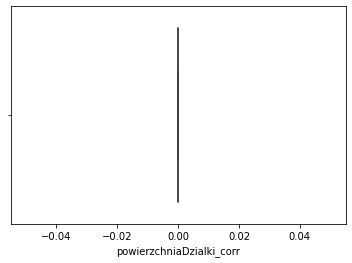

In [53]:
sns.boxplot(final['powierzchniaDzialki_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



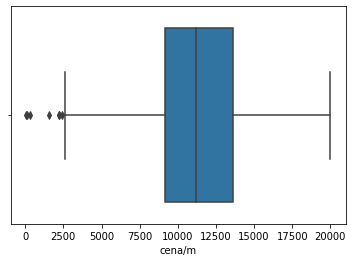

In [54]:
sns.boxplot(final['cena/m'])

In [55]:
final_plots=final.copy()

In [56]:
dummies = pd.get_dummies(final_plots, columns=['rodzajZabudowy', 'materialBudynku', 'stanWykonczenia', 'okna', 'rynek'])

In [57]:
from sklearn.cluster import KMeans

In [58]:
final_plots.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,NaN,NaN
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170


In [59]:
df=pd.DataFrame()

In [60]:
final_plots1=final_plots[['powierzchnia_corr','cena/m']].copy()#'lPokoi','lPieter_crr',,'powierzchniaDzialki_corr','rokBudowy_corr',,'locationX','locationY'
#df['lPokoi']=final_plots.loc[:,'lPokoi']/10
df["powierzchnia_corr"]=np.log(final_plots1["powierzchnia_corr"])/3-1
#df["powierzchniaDzialki_corr"]=np.log(final_plots["powierzchniaDzialki_corr"]+1)/14
#df["rokBudowy_corr"]=np.power(final_plots["rokBudowy_corr"]-1899,4)/3e8
df["cena/m"]=final_plots1["cena/m"]/20000
#df["locationX"]=(final_plots["locationX"]-21)/4
#df["locationY"]=(final_plots["locationY"]-52)/4
#df['lPieter_crr']=final_plots.loc[:,'lPieter_crr']/10

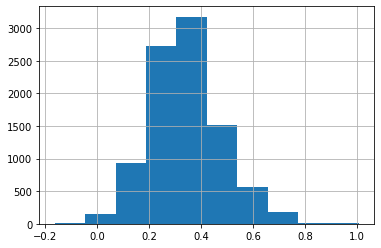

In [61]:
df["powierzchnia_corr"].hist()

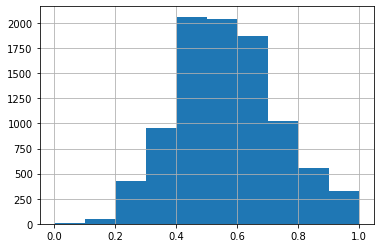

In [62]:
df["cena/m"].hist()

In [63]:
print(df.shape)
print(dummies.shape)

(9312, 2)
(9312, 37)


In [64]:
df.isna().sum()

powierzchnia_corr    0
cena/m               0
dtype: int64

In [65]:
values=[]
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df.values)
  values.append(kmeans.score(df.values))

In [66]:
print(np.abs(values))
print(values)

[263.8022586  187.21576944 148.64246864 127.79375135 107.25145926
  93.10248077  80.29416626  71.87475184  64.4717745   59.72707555
  54.99324803  51.31326157  47.24002647]
[-263.8022586041155, -187.21576943969558, -148.6424686413502, -127.79375135410486, -107.25145926098476, -93.1024807726858, -80.294166258025, -71.87475184404323, -64.47177449895108, -59.727075550030136, -54.9932480336072, -51.313261568690024, -47.24002646760833]


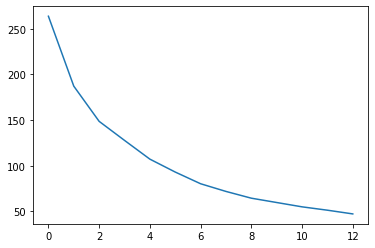

In [67]:
plt.plot(np.abs(values))

In [68]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df.values)


In [69]:
final_plots['kmean']=kmeans.predict(df.values)

In [70]:
final_plots.head(10)

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY,kmean
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889,3
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,NaN,NaN,4
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333,1
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889,0
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170,2
5,3,apartamentowiec,0,do zamieszkania,aluminiowe,wtórny,107.40,0,2004,12942.281192,10,NaN,NaN,1
6,3,blok,wielka płyta,do remontu,plastikowe,wtórny,61.70,0,1970,9708.265802,10,20.933889,52.288889,5
7,3,0,0,do zamieszkania,0,wtórny,82.00,0,2004,14085.378049,16,20.981111,52.216389,1
8,1,kamienica,cegła,do zamieszkania,plastikowe,wtórny,26.90,0,1938,14498.141264,4,21.028333,52.263333,0
9,4,blok,0,0,0,wtórny,80.02,0,1998,11247.188203,17,20.957222,52.233333,4


In [71]:
final_plots=final_plots.replace(np.nan, 0)

In [72]:
final_plots['powierzchnia_cat']=(final_plots['powierzchnia_corr']/50).astype(int)*50
final_plots['powierzchniaDzialki_cat']=(final_plots['powierzchniaDzialki_corr']/500).astype(int)*500
final_plots['rokBudowy_cat']=(final_plots['rokBudowy_corr']/10).astype(int)*10

In [73]:
final_plots['locationX_cat']=(final_plots['locationX']).astype(int)
final_plots['locationY_cat']=(final_plots['locationY']).astype(int)

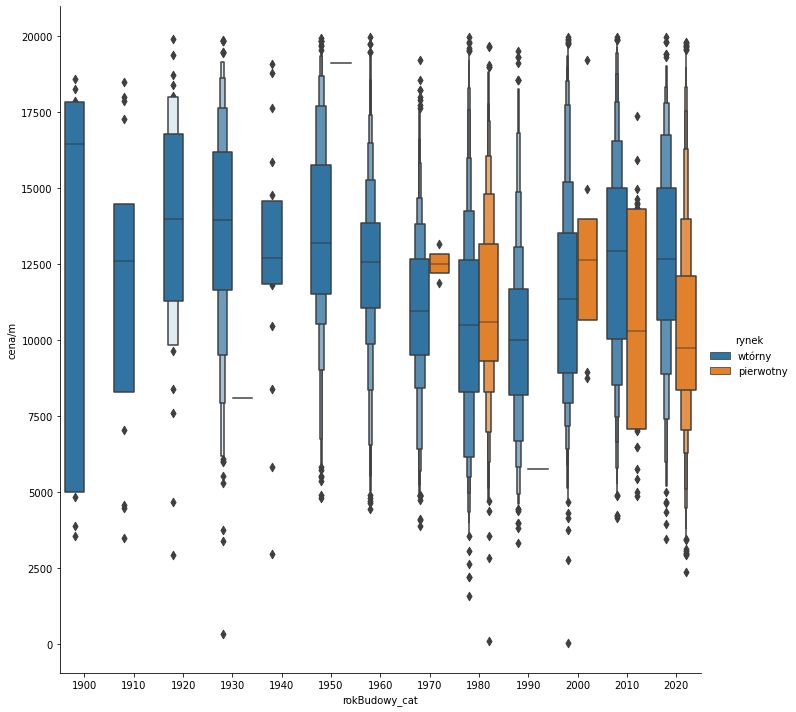

In [74]:
sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="boxen", data=final_plots,height=10)

In [29]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 147 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objs as go
from plotly import tools

In [ ]:
pip install cufflinks plotly

In [ ]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [ ]:
pip install chart-studio

In [ ]:
import plotly.io as pio
pio.renderers.default='notebook'
import chart_studio.plotly as py
import plotly.graph_objects as go

In [ ]:
trace0 = go.Box(
    x=final_plots[final_plots['rynek']=='wtórny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek wtórny',
    marker = dict(
        color = 'red',
    
    )
)
trace1 = go.Box(
    x=final_plots[final_plots['rynek']=='pierwotny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek pierwotny',
    marker = dict(
        color = 'blue',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0,trace1]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

nieruchomości z lat 60-90 jako rynek pierwotny???

In [ ]:
sns.catplot(x="powierzchniaDzialki_cat", y="cena/m", hue ='rynek',kind="boxen", data=final_plots,height=10)

powierzchnia dzialki ok 0 i to ma sens

In [ ]:
sns.catplot(y="rynek", x="cena/m", kind="boxen", data=final_plots,height=10)

In [ ]:
trace0 = go.Box(
    y=final_plots.loc[:,'cena/m'],
    x=final_plots.loc[:,'stanWykonczenia'],
    name = '0',
    marker = dict(
        color = 'red',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

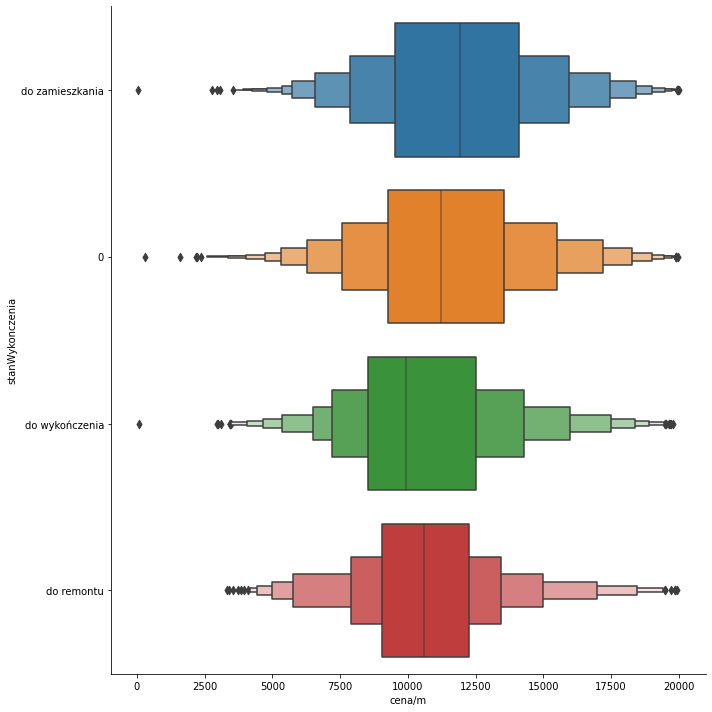

In [39]:
sns.catplot(y="stanWykonczenia", x="cena/m", kind="boxen", data=final_plots,height=10)#hue="kmean", 

In [ ]:
trace0 = go.Box(
    y=final_plots.loc[:,'cena/m'],
    x=final_plots.loc[:,'materialBudynku'],
    name = '0',
    marker = dict(
        color = 'red',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

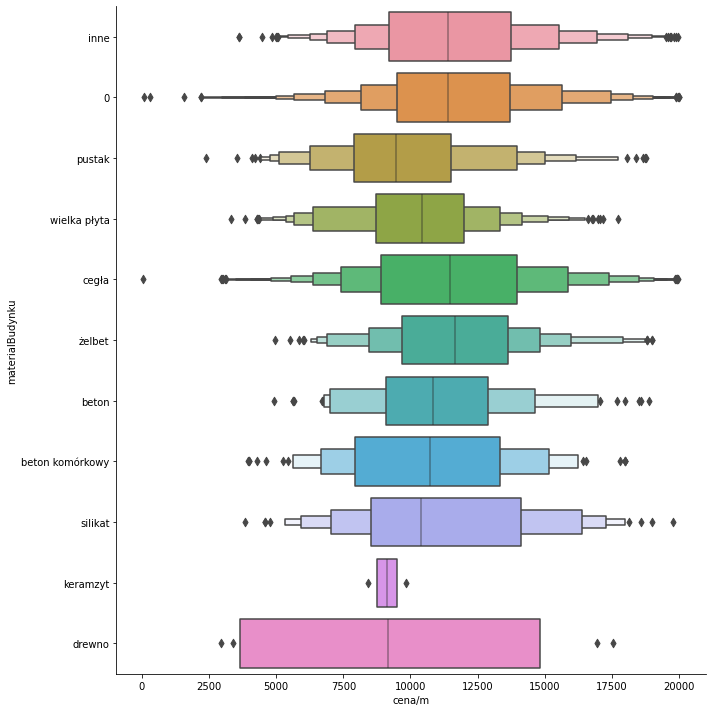

In [41]:
sns.catplot(y="materialBudynku", x="cena/m", kind="boxen", data=final_plots,height=10)#hue="kmean"

In [42]:
trace0 = go.Box(
    y=final_plots.loc[:,'cena/m'],
    x=final_plots.loc[:,'rodzajZabudowy'],
    name = '0',
    marker = dict(
        color = 'red',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

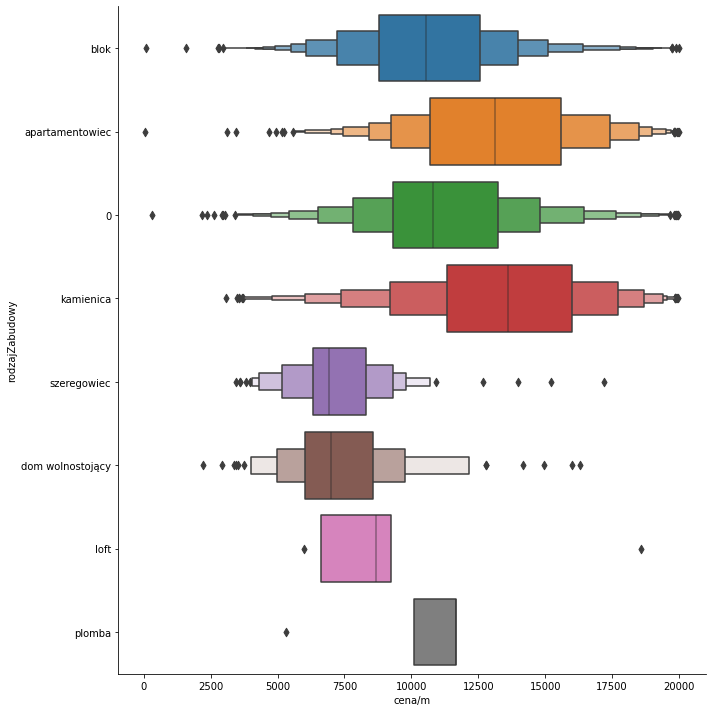

In [43]:
sns.catplot(y="rodzajZabudowy", x="cena/m",  kind="boxen", data=final_plots,height=10)

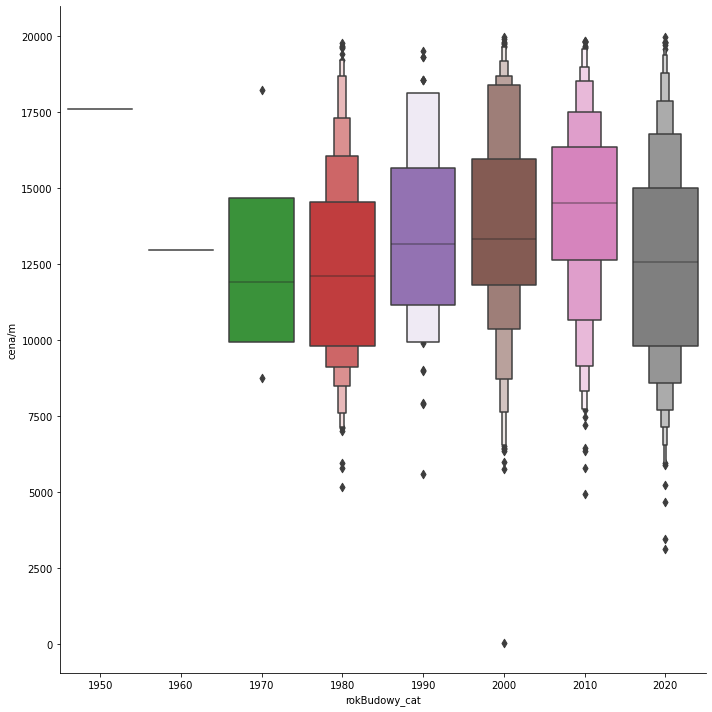

In [44]:
sns.catplot(x="rokBudowy_cat", y="cena/m",  kind="boxen", data=final_plots[final_plots["rodzajZabudowy"]=='apartamentowiec'],height=10)

In [ ]:
sns.catplot(x="rokBudowy_cat", y="cena/m",  kind="boxen", data=final_plots[final_plots["rodzajZabudowy"]=='kamienica'],height=10)

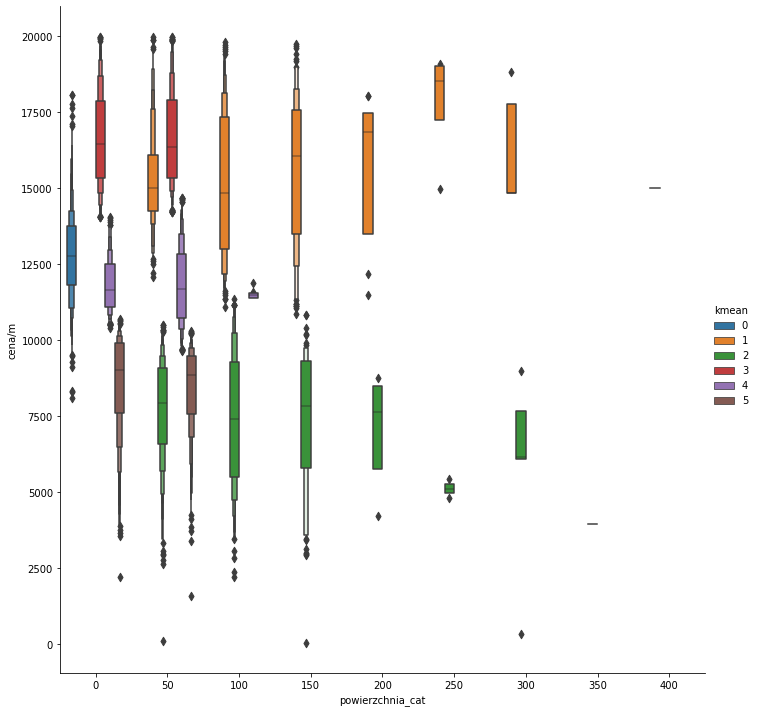

In [46]:
sns.catplot(x="powierzchnia_cat", y="cena/m", hue="kmean", kind="boxen", data=final_plots,height=10)